# Plotting response of and Erdos Reservoir as Spectral Radius Changes

Old rescomp package

In [1]:
%run "../HyperParameterOpt/GenerateExperiments/res_experiment.py"
import copy
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from scipy import sparse
from math import floor

In [2]:

DIFF_EQ_PARAMS = {
                  "x0": [-20, 10, -.5],
                  "begin": 0,
                  "end": 85,
                  "timesteps": 85000,
                  "train_per": .889,
                  "solver": lorenz_equ,
                  "clip": 40
                 }

RES_PARAMS = {
              "uniform_weights": True,
              "solver": "ridge",
              "ridge_alpha":.0001,
              "signal_dim": 3,
              "network": "random graph",

              "res_sz": 500,
              "activ_f": np.tanh,
              "connect_p": .1,
              "spect_rad": 50,
              "gamma": 50,
              "sigma": 1,
              "sparse_res": True,
             }

TOL = 5

In [3]:
def erdos(mean_degree,n=None):
    """ Erdos-Renyi random graph.
    Parameter
        mean_degree     (int): specific to this topology
        n               (int): n is the size of the network
    """
    if n is None:
        n = np.random.randint(smallest_network_size,biggest_network_size)
    p = mean_degree/n
    A = nx.adj_matrix(nx.erdos_renyi_graph(n,p)).T
    return sparse.dok_matrix(A)

def remove_edges(A, p):
    """ Randomly removes 'p' percent of edges from a sparse matrix 'A'
    """
    nedges = floor(p*np.sum(A != 0))
    A = A.todok()
    # Remove Edges
    keys = list(A.keys())
    remove_idx = np.random.choice(range(len(keys)),size=nedges, replace=False)
    remove = [keys[i] for i in remove_idx]
    for e in remove:
        A[e] = 0
    return A

def erdos_err(rho, remove_p, mean_degree, plot=False):
    n = RES_PARAMS["res_sz"]
    A = remove_edges(erdos(mean_degree, n), remove_p)
    A = sparse.lil_matrix(A)
    DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
    train_t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
    rc = ResComp(A, **RES_PARAMS)
    rc.state_0 = 2*np.random.rand(rc.res_sz) - 1
    r0 = rc.state_0
    err, R = rc.fit(train_t, u, return_states=True)
    acc_dur = how_long_accurate(u(test_t), rc.predict(test_t), tol=TOL)
    print(f"VPT: {acc_dur}")
    if plot:
        plot_states(train_t, R, u(train_t), err, rho)
    return err, 100

def plot_states(t, R, U, err, rho):
    plt.plot(t - 40, R)
    end=10
    plt.title(f"$\\rho = {rho}$ ", fontsize=16)
    plt.ylim([-1.1, 1.1])
    plt.xlim([0, end + 0.1])
    plt.xticks([0])
    plt.yticks([-1, 1], fontsize=18)
    plt.xticks([0, 5, 10], fontsize=18)
    plt.xlabel("Time", fontsize=16)
    plt.ylabel("Node State", fontsize=16)
    plt.show()
    print(f"Error {err}")

## Decoupled Reservoir Node States. Spectral Radius = 0.25

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]

In [10]:
remove_p = 0.7
mean_degree = 4

VPT: 416


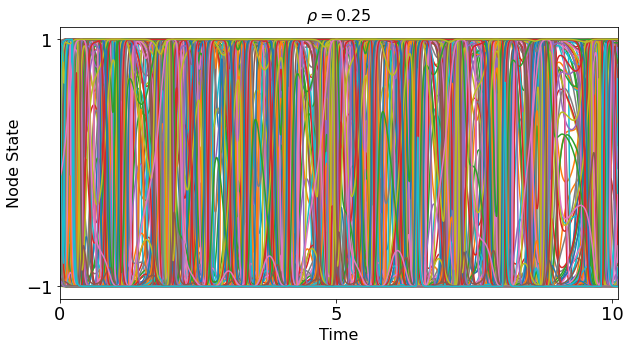

Error 0.15289324840683838


(0.15289324840683838, 100)

In [11]:
erdos_err(0.25, remove_p, mean_degree, plot=True)

VPT: 28


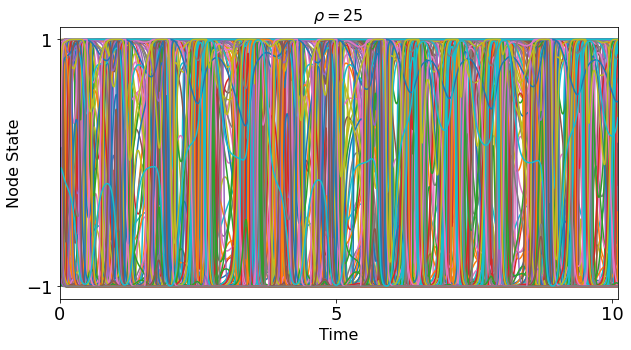

Error 0.03647011672311708


(0.03647011672311708, 100)

In [12]:
erdos_err(25, remove_p, mean_degree, plot=True)

VPT: 884


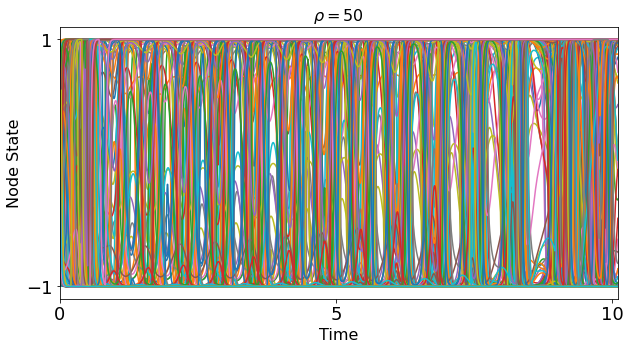

Error 0.058956153571915186


(0.058956153571915186, 100)

In [13]:
erdos_err(50, remove_p, mean_degree, plot=True)

## Decrease Connectivity

VPT: 259


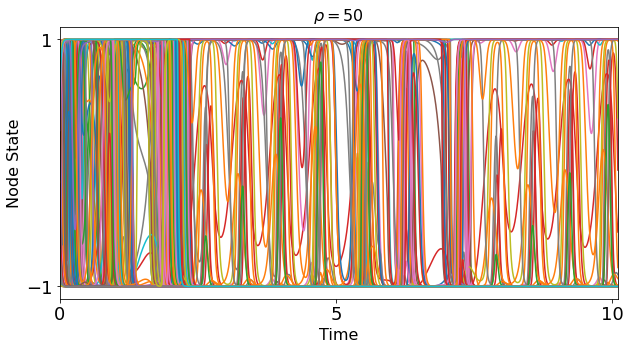

Error 1.1520541637199464


(1.1520541637199464, 100)

In [14]:
erdos_err(50, 0.0, mean_degree, plot=True)

VPT: 246


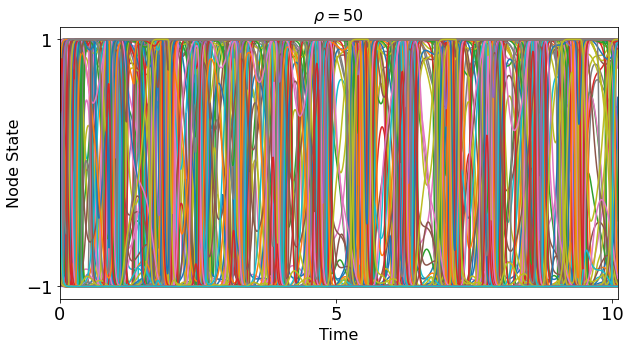

Error 0.3773285821765969


(0.3773285821765969, 100)

In [15]:
erdos_err(50, 0.5, mean_degree, plot=True)

VPT: 1827


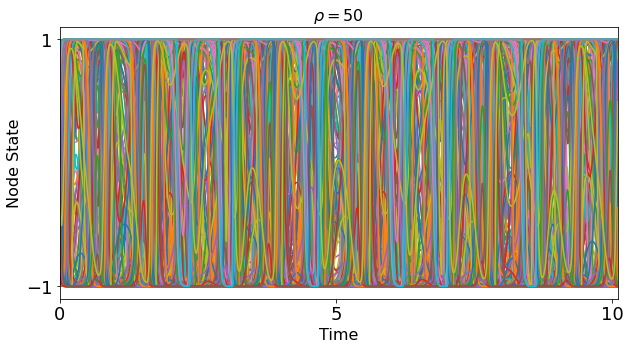

Error 0.019610663870566945


(0.019610663870566945, 100)

In [16]:
erdos_err(50, 0.9, mean_degree, plot=True)

## Spectral Radius = 50 Mean Error

In [17]:
N = 50 # Number of tests

### Remove no edges

In [18]:
rho = 50.0
remove_p = 0.0
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 81
VPT: 10
VPT: 61
VPT: 102
VPT: 270
VPT: 58
VPT: 65
VPT: 34
VPT: 278
VPT: 18
VPT: 56
VPT: 140
VPT: 61
VPT: 181
VPT: 65
VPT: 95
VPT: 87
VPT: 73
VPT: 201
VPT: 169
VPT: 177
VPT: 44
VPT: 80
VPT: 49
VPT: 59
VPT: 123
VPT: 291
VPT: 118
VPT: 65
VPT: 73
VPT: 0
VPT: 76
VPT: 101
VPT: 537
VPT: 120
VPT: 17
VPT: 70
VPT: 54
VPT: 188
VPT: 81
VPT: 112
VPT: 55
VPT: 232
VPT: 37
VPT: 63
VPT: 246
VPT: 338
VPT: 218
VPT: 57
VPT: 36
Error: 1.3667634113554925 (Linf) 100.0 (L2)


### Remove 50% of edges

In [19]:
rho = 50.0
remove_p = 0.5
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 1105
VPT: 196
VPT: 180
VPT: 271
VPT: 235
VPT: 1094
VPT: 588
VPT: 157
VPT: 393
VPT: 152
VPT: 348
VPT: 301
VPT: 155
VPT: 58
VPT: 840
VPT: 1259
VPT: 304
VPT: 241
VPT: 114
VPT: 142
VPT: 640
VPT: 1664
VPT: 45
VPT: 34
VPT: 64
VPT: 795
VPT: 443
VPT: 477
VPT: 34
VPT: 819
VPT: 409
VPT: 910
VPT: 601
VPT: 458
VPT: 162
VPT: 446
VPT: 572
VPT: 1149
VPT: 296
VPT: 74
VPT: 184
VPT: 40
VPT: 24
VPT: 239
VPT: 81
VPT: 834
VPT: 680
VPT: 428
VPT: 800
VPT: 142
Error: 0.23427407090141508 (Linf) 100.0 (L2)


### Remove 90% of edges

In [20]:
rho = 50.0
remove_p = 0.9
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 2454
VPT: 49
VPT: 865
VPT: 3603
VPT: 671
VPT: 927
VPT: 1334
VPT: 2767
VPT: 2030
VPT: 213
VPT: 1909
VPT: 2601
VPT: 276
VPT: 671
VPT: 169
VPT: 1578
VPT: 1618
VPT: 899
VPT: 2070
VPT: 2168
VPT: 15
VPT: 1536
VPT: 1906
VPT: 1249
VPT: 900
VPT: 3397
VPT: 1445
VPT: 1613
VPT: 1355
VPT: 660
VPT: 2226
VPT: 126
VPT: 2540
VPT: 1659
VPT: 858
VPT: 1280
VPT: 627
VPT: 4995
VPT: 1152
VPT: 1029
VPT: 779
VPT: 3525
VPT: 754
VPT: 208
VPT: 748
VPT: 1187
VPT: 1502
VPT: 1331
VPT: 1189
VPT: 1234
Error: 0.029153599577587078 (Linf) 100.0 (L2)


## Connectivity = 0.7 Mean Error

### Rho = 0.25

In [21]:
rho = 0.25
remove_p = 0.7
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 676
VPT: 973
VPT: 3202
VPT: 1211
VPT: 1317
VPT: 282
VPT: 64
VPT: 1116
VPT: 2509
VPT: 127
VPT: 14
VPT: 2521
VPT: 808
VPT: 1381
VPT: 1216
VPT: 613
VPT: 86
VPT: 884
VPT: 315
VPT: 253
VPT: 1233
VPT: 154
VPT: 731
VPT: 992
VPT: 540
VPT: 819
VPT: 1460
VPT: 2093
VPT: 442
VPT: 149
VPT: 668
VPT: 1482
VPT: 1141
VPT: 17
VPT: 213
VPT: 877
VPT: 418
VPT: 892
VPT: 478
VPT: 913
VPT: 612
VPT: 29
VPT: 1715
VPT: 821
VPT: 270
VPT: 131
VPT: 55
VPT: 1888
VPT: 290
VPT: 270
Error: 0.08377826400923279 (Linf) 100.0 (L2)


### Rho = 25

In [22]:
rho = 25.0
remove_p = 0.7
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 2128
VPT: 862
VPT: 2050
VPT: 1979
VPT: 168
VPT: 886
VPT: 614
VPT: 201
VPT: 1291
VPT: 470
VPT: 563
VPT: 1194
VPT: 1612
VPT: 842
VPT: 218
VPT: 523
VPT: 179
VPT: 510
VPT: 442
VPT: 394
VPT: 1302
VPT: 450
VPT: 294
VPT: 533
VPT: 581
VPT: 70
VPT: 161
VPT: 1114
VPT: 1209
VPT: 1146
VPT: 2515
VPT: 2622
VPT: 685
VPT: 63
VPT: 60
VPT: 1589
VPT: 308
VPT: 987
VPT: 3017
VPT: 199
VPT: 125
VPT: 289
VPT: 191
VPT: 617
VPT: 320
VPT: 683
VPT: 308
VPT: 1676
VPT: 701
VPT: 837
Error: 0.0821288120763356 (Linf) 100.0 (L2)


### Rho = 50

In [23]:
rho = 50.0
remove_p = 0.7
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 3927
VPT: 1842
VPT: 672
VPT: 489
VPT: 1607
VPT: 861
VPT: 2078
VPT: 1066
VPT: 513
VPT: 333
VPT: 7
VPT: 144
VPT: 67
VPT: 40
VPT: 1281
VPT: 1509
VPT: 1255
VPT: 783
VPT: 2248
VPT: 193
VPT: 940
VPT: 68
VPT: 545
VPT: 47
VPT: 839
VPT: 150
VPT: 767
VPT: 1618
VPT: 85
VPT: 924
VPT: 618
VPT: 120
VPT: 157
VPT: 402
VPT: 286
VPT: 1095
VPT: 519
VPT: 1749
VPT: 409
VPT: 308
VPT: 1737
VPT: 515
VPT: 1098
VPT: 941
VPT: 666
VPT: 1010
VPT: 89
VPT: 1868
VPT: 27
VPT: 6
Error: 0.07773751233487118 (Linf) 100.0 (L2)


# Smaller Size Network

In [4]:
RES_PARAMS["res_sz"] = 50


## Low Connectivity, Increase Spectral Rad

In [6]:
remove_p = 0.7
mean_degree = 4

VPT: 5


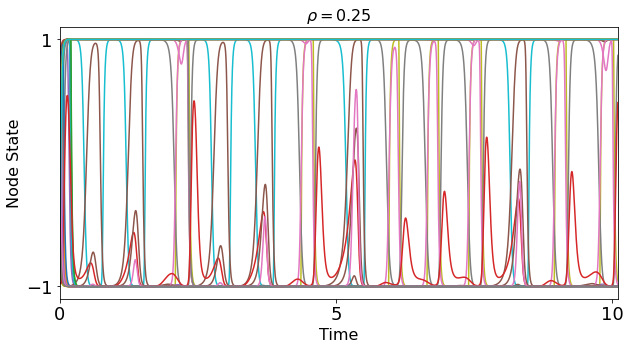

Error 6.689479624880093


(6.689479624880093, 100)

In [26]:
erdos_err(0.25, remove_p, mean_degree, plot=True)

VPT: 16


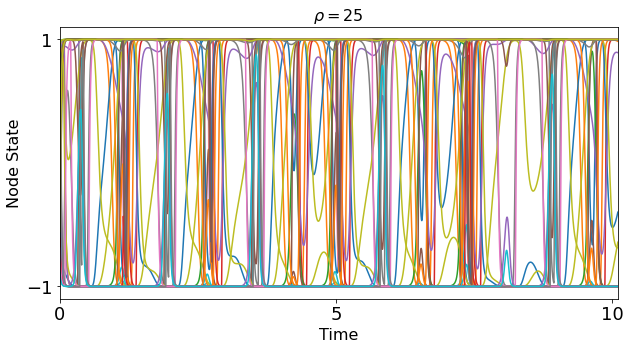

Error 3.407955302535916


(3.407955302535916, 100)

In [27]:
erdos_err(25, remove_p, mean_degree, plot=True)

VPT: 24


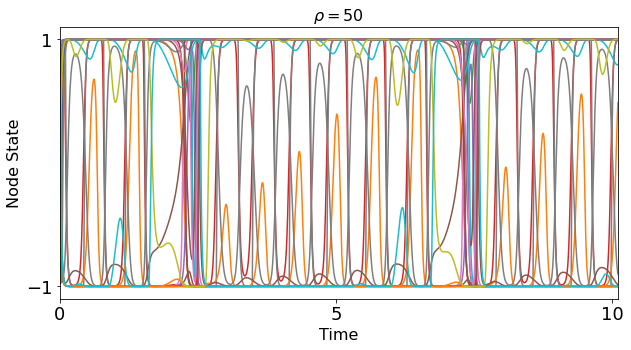

Error 5.14175921996848


(5.14175921996848, 100)

In [28]:
erdos_err(50, remove_p, mean_degree, plot=True)

## Decrease Connectivity

VPT: 0


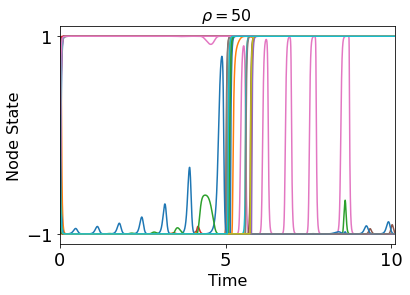

Error 13.495334143948895


(13.495334143948895, 100)

In [7]:
erdos_err(50, 0.0, mean_degree, plot=True)

VPT: 38


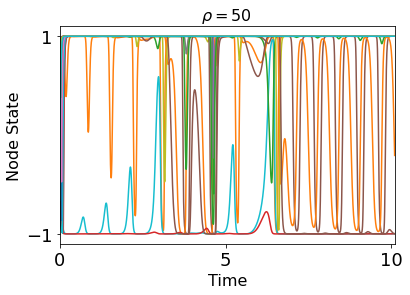

Error 6.042540587467558


(6.042540587467558, 100)

In [8]:
erdos_err(50, 0.5, mean_degree, plot=True)

VPT: 19


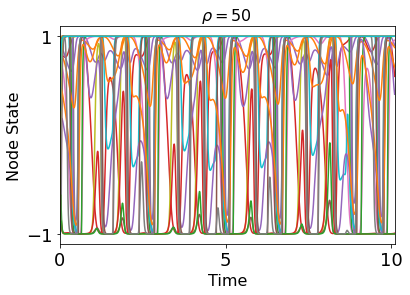

Error 3.2547363293148877


(3.2547363293148877, 100)

In [9]:
erdos_err(50, 0.7, mean_degree, plot=True)

## Spectral Radius = 50 Mean Error

### Remove no edges

In [32]:
rho = 50.0
remove_p = 0.0
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 45
VPT: 16
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 25
VPT: 0
VPT: 0
VPT: 65
VPT: 0
VPT: 166
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 74
VPT: 0
VPT: 23
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 82
VPT: 0
VPT: 220
VPT: 4
VPT: 0
VPT: 0
VPT: 0
VPT: 26
VPT: 0
VPT: 0
VPT: 58
VPT: 0
VPT: 80
VPT: 0
VPT: 0
VPT: 31
Error: 9.761691923471938 (Linf) 100.0 (L2)


### Remove 50% of edges

In [33]:
rho = 50.0
remove_p = 0.5
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 18
VPT: 0
VPT: 31
VPT: 33
VPT: 39
VPT: 0
VPT: 0
VPT: 0
VPT: 54
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 54
VPT: 0
VPT: 0
VPT: 0
VPT: 18
VPT: 0
VPT: 0
VPT: 0
VPT: 32
VPT: 68
VPT: 6
VPT: 0
VPT: 14
VPT: 40
VPT: 0
VPT: 86
VPT: 0
VPT: 0
VPT: 21
VPT: 0
VPT: 103
VPT: 197
VPT: 0
VPT: 0
VPT: 0
VPT: 5
VPT: 23
VPT: 0
VPT: 1
VPT: 33
VPT: 5
VPT: 0
VPT: 0
VPT: 0
VPT: 0
Error: 6.972069743542232 (Linf) 100.0 (L2)


### Remove 80% of edges

In [34]:
rho = 50.0
remove_p = 0.8
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 12
VPT: 27
VPT: 5
VPT: 9
VPT: 30
VPT: 11
VPT: 27
VPT: 23
VPT: 72
VPT: 68
VPT: 6
VPT: 0
VPT: 0
VPT: 30
VPT: 265
VPT: 14
VPT: 0
VPT: 36
VPT: 98
VPT: 23
VPT: 55
VPT: 45
VPT: 38
VPT: 18
VPT: 98
VPT: 55
VPT: 0
VPT: 1
VPT: 102
VPT: 4
VPT: 18
VPT: 42
VPT: 21
VPT: 47
VPT: 7
VPT: 127
VPT: 0
VPT: 1
VPT: 70
VPT: 0
VPT: 39
VPT: 13
VPT: 5
VPT: 12
VPT: 46
VPT: 18
VPT: 73
VPT: 22
VPT: 30
VPT: 0
Error: 3.575314368451888 (Linf) 100.0 (L2)


## Connectivity = 0.7 Mean Error

### Rho = 0.25

In [35]:
rho = 0.25
remove_p = 0.7
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 0
VPT: 23
VPT: 0
VPT: 220
VPT: 42
VPT: 22
VPT: 45
VPT: 103
VPT: 33
VPT: 9
VPT: 53
VPT: 126
VPT: 1
VPT: 14
VPT: 3
VPT: 0
VPT: 0
VPT: 0
VPT: 48
VPT: 109
VPT: 38
VPT: 16
VPT: 48
VPT: 121
VPT: 3
VPT: 1
VPT: 8
VPT: 81
VPT: 53
VPT: 40
VPT: 94
VPT: 0
VPT: 28
VPT: 6
VPT: 0
VPT: 28
VPT: 0
VPT: 81
VPT: 0
VPT: 12
VPT: 18
VPT: 49
VPT: 18
VPT: 257
VPT: 3
VPT: 67
VPT: 65
VPT: 0
VPT: 0
VPT: 2
Error: 4.746760822913781 (Linf) 100.0 (L2)


### Rho = 25

In [36]:
rho = 25
remove_p = 0.7
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 0
VPT: 53
VPT: 8
VPT: 0
VPT: 0
VPT: 147
VPT: 4
VPT: 0
VPT: 0
VPT: 12
VPT: 1
VPT: 14
VPT: 0
VPT: 20
VPT: 25
VPT: 129
VPT: 32
VPT: 79
VPT: 69
VPT: 53
VPT: 10
VPT: 26
VPT: 142
VPT: 11
VPT: 25
VPT: 98
VPT: 4
VPT: 0
VPT: 0
VPT: 10
VPT: 43
VPT: 1
VPT: 23
VPT: 39
VPT: 0
VPT: 0
VPT: 4
VPT: 72
VPT: 38
VPT: 1
VPT: 132
VPT: 26
VPT: 64
VPT: 29
VPT: 39
VPT: 81
VPT: 159
VPT: 90
VPT: 45
VPT: 26
Error: 4.596709519679751 (Linf) 100.0 (L2)


### Rho = 50

In [37]:
rho = 50
remove_p = 0.7
mean_degree = 4
inferr = []
l2err = []
for i in range(N):
    inf, l2 = erdos_err(rho, remove_p, mean_degree)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

VPT: 43
VPT: 0
VPT: 41
VPT: 20
VPT: 15
VPT: 0
VPT: 25
VPT: 0
VPT: 9
VPT: 5
VPT: 25
VPT: 14
VPT: 0
VPT: 25
VPT: 8
VPT: 10
VPT: 8
VPT: 229
VPT: 45
VPT: 195
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 0
VPT: 1
VPT: 1
VPT: 0
VPT: 28
VPT: 11
VPT: 41
VPT: 26
VPT: 1
VPT: 0
VPT: 43
VPT: 0
VPT: 0
VPT: 7
VPT: 125
VPT: 24
VPT: 5
VPT: 0
VPT: 0
VPT: 16
VPT: 0
VPT: 0
VPT: 22
VPT: 134
VPT: 0
Error: 4.844860855197235 (Linf) 100.0 (L2)
